In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
house_prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [5]:
# Y is the target variable
Y = house_prices_df['saleprice']


# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 465)


In [7]:
print('the number of observations in training set is {}'.format(X_train.shape[0]))
print('the number of observations in test set is {}'.format(X_test.shape[0]))

the number of observations in training set is 1168
the number of observations in test set is 292


In [8]:
X_train.head()

,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
151,5,969,2,440,969,0,0,1,0,1
262,8,2574,3,868,1482,0,0,1,0,1
1037,8,2263,2,905,1055,0,0,1,0,1
1183,5,1130,2,720,1120,0,0,1,0,1
933,7,1500,2,570,1500,0,0,1,0,1


In [9]:
X_train = sm.add_constant(X_train)

In [10]:
results = sm.OLS(y_train, X_train).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     383.1
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:44:53   Log-Likelihood:                -13972.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1157   BIC:                         2.802e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.039e+05   2.06e+04     -5.037      

mszoning_RM I have noticed that this P-value is the highest amongst the other explanatory variables, but it is still less than 0.1. Therefore, it is statistically significant.

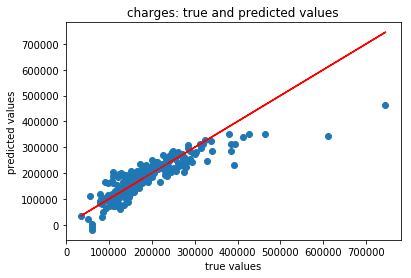

mean absolute error of the predictions is: 25546.80382858886
mean squared error of the predictions is: 1559083821.9730694
root mean squared error of the prediction is: 39485.2354934483
mean absolute percentage error of the prediction is: 15.551420347537784


In [11]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('charges: true and predicted values')
plt.show()

print('mean absolute error of the predictions is: {}'.format(mean_absolute_error(y_test, y_preds)))
print('mean squared error of the predictions is: {}'.format(mse(y_test, y_preds)))
print('root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds)))
print('mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


The model seems to better predict lower and some higher values. The values are more tightly fit around the red line.

In [13]:
# Y is the target variable
Y = house_prices_df['saleprice']


# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']]



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 465)


In [15]:
print('the number of observations in training set is {}'.format(X_train.shape[0]))
print('the number of observations in test set is {}'.format(X_test.shape[0]))

the number of observations in training set is 1168
the number of observations in test set is 292


In [16]:
X_train.head()

,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf
151,5,969,2,440,969
262,8,2574,3,868,1482
1037,8,2263,2,905,1055
1183,5,1130,2,720,1120
933,7,1500,2,570,1500


In [17]:
X_train = sm.add_constant(X_train)

In [18]:
results = sm.OLS(y_train, X_train).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     731.8
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:03:00   Log-Likelihood:                -13995.
No. Observations:                1168   AIC:                         2.800e+04
Df Residuals:                    1162   BIC:                         2.803e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.889e+04   5212.322    -18.972      

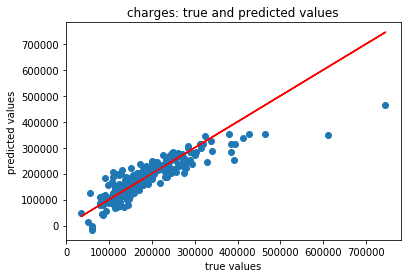

mean absolute error of the predictions is: 25964.899373829587
mean squared error of the predictions is: 1573437538.2928107
root mean squared error of the prediction is: 39666.57961423963
mean absolute percentage error of the prediction is: 16.097178444698216


In [19]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('charges: true and predicted values')
plt.show()

print('mean absolute error of the predictions is: {}'.format(mean_absolute_error(y_test, y_preds)))
print('mean squared error of the predictions is: {}'.format(mse(y_test, y_preds)))
print('root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds)))
print('mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


The model based on the metrics like MSE, RMSE, and MAE are all higher than the previous. I ommitted the dummy variables that accounted for mszoninig and street. 